<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/Combining_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

#read and open covid deaths data file
url = "https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/Covid_deaths_cleaned.csv"
df1 = pd.read_csv(url)
df1.tail(3)

,Start Date,End Date,Year,Week,COVID-19 Deaths
154,12/11/2022,12/17/2022,2022,50.0,3194.0
155,12/18/2022,12/24/2022,2022,51.0,3325.0
156,12/25/2022,12/31/2022,2022,52.0,3668.0


In [14]:
df1.dtypes

,0
Start Date,object
End Date,object
Year,object
Week,float64
COVID-19 Deaths,float64


In [15]:
df1

,Start Date,End Date,Year,Week,COVID-19 Deaths
0,12/29/2019,01/04/2020,2019/2020,1.0,0.0
1,01/05/2020,01/11/2020,2020,2.0,1.0
2,01/12/2020,01/18/2020,2020,3.0,2.0
3,01/19/2020,01/25/2020,2020,4.0,3.0
4,01/26/2020,02/01/2020,2020,5.0,0.0
...,...,...,...,...,...
152,11/27/2022,12/03/2022,2022,48.0,2599.0
153,12/04/2022,12/10/2022,2022,49.0,3042.0
154,12/11/2022,12/17/2022,2022,50.0,3194.0
155,12/18/2022,12/24/2022,2022,51.0,3325.0


In [16]:
df1['Start Date'] = pd.to_datetime(df1['Start Date'], errors='coerce')
df1['End Date'] = pd.to_datetime(df1['End Date'], errors='coerce')

In [17]:
df1

,Start Date,End Date,Year,Week,COVID-19 Deaths
0,2019-12-29,2020-01-04,2019/2020,1.0,0.0
1,2020-01-05,2020-01-11,2020,2.0,1.0
2,2020-01-12,2020-01-18,2020,3.0,2.0
3,2020-01-19,2020-01-25,2020,4.0,3.0
4,2020-01-26,2020-02-01,2020,5.0,0.0
...,...,...,...,...,...
152,2022-11-27,2022-12-03,2022,48.0,2599.0
153,2022-12-04,2022-12-10,2022,49.0,3042.0
154,2022-12-11,2022-12-17,2022,50.0,3194.0
155,2022-12-18,2022-12-24,2022,51.0,3325.0


In [18]:
#read and open vaccine doses distributed data file
df2 = pd.read_csv('clean_vaccine_data (3).csv')
df2.head(3)

,Day,Start_Date,End_Date,Total_Doses,Week
0,2019-12-21,2019-12-15,2019-12-21,57909,50.0
1,2019-12-28,2019-12-22,2019-12-28,1343199,51.0
2,2020-01-04,2019-12-29,2020-01-04,2082861,52.0


In [19]:
df2.dtypes

,0
Day,object
Start_Date,object
End_Date,object
Total_Doses,int64
Week,float64


In [20]:
df2[['Start_Date', 'End_Date', 'Total_Doses', 'Week']]

,Start_Date,End_Date,Total_Doses,Week
0,2019-12-15,2019-12-21,57909,50.0
1,2019-12-22,2019-12-28,1343199,51.0
2,2019-12-29,2020-01-04,2082861,52.0
3,2020-01-05,2020-01-11,3136353,1.0
4,2020-01-12,2020-01-18,5371448,2.0
...,...,...,...,...
121,2022-04-10,2022-04-16,333375,14.0
122,2022-04-17,2022-04-23,359286,15.0
123,2022-04-24,2022-04-30,461086,16.0
124,2022-05-01,2022-05-07,609559,17.0


In [21]:
print(df1['Week'].dtype)
print(df2['Week'].dtype)
print(df1['Start Date'].dtype)
print(df2['Start_Date'].dtype)

float64
float64
datetime64[ns]
object


In [22]:
df2['Start_Date'].min()

'2019-12-15'

In [23]:
# Convert 'Start_Date' and 'End_Date' columns to datetime objects
df2['Start_Date'] = pd.to_datetime(df2['Start_Date'])
df2['End_Date'] = pd.to_datetime(df2['End_Date'])


start_date = '2020-01-05'
df1 = df1[df1['Start Date'] >= start_date]
df2 = df2[df2['Start_Date'] >= start_date]

# Now you can access the .dt accessor:
df1['Week'] = df1['Start Date'].dt.isocalendar().week
df2['Week'] = df2['Start_Date'].dt.isocalendar().week

<ipython-input-23-533dc1266706>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Week'] = df1['Start Date'].dt.isocalendar().week


In [24]:
df_updated= df2.join(df1, on= 'Week' ,lsuffix= '_left', rsuffix= '_right', how= 'left')

In [25]:
df_updated

,Week,Day,Start_Date,End_Date,Total_Doses,Week_left,Start Date,End Date,Year,Week_right,COVID-19 Deaths
3,1,2020-01-11,2020-01-05,2020-01-11,3136353,1,2020-01-05,2020-01-11,2020,1,1.0
4,2,2020-01-18,2020-01-12,2020-01-18,5371448,2,2020-01-12,2020-01-18,2020,2,2.0
5,3,2020-01-25,2020-01-19,2020-01-25,6999168,3,2020-01-19,2020-01-25,2020,3,3.0
6,4,2020-02-01,2020-01-26,2020-02-01,8741069,4,2020-01-26,2020-02-01,2020,4,0.0
7,5,2020-02-08,2020-02-02,2020-02-08,9450425,5,2020-02-02,2020-02-08,2020,5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
121,14,2022-04-16,2022-04-10,2022-04-16,333375,14,2020-04-05,2020-04-11,2020,14,16347.0
122,15,2022-04-23,2022-04-17,2022-04-23,359286,15,2020-04-12,2020-04-18,2020,15,17221.0
123,16,2022-04-30,2022-04-24,2022-04-30,461086,16,2020-04-19,2020-04-25,2020,16,15557.0
124,17,2022-05-07,2022-05-01,2022-05-07,609559,17,2020-04-26,2020-05-02,2020,17,13223.0


In [26]:
df_updated= df_updated.iloc[:,[0, 1, 2, 3, 4, 8, 10]]
df_updated

,Week,Day,Start_Date,End_Date,Total_Doses,Year,COVID-19 Deaths
3,1,2020-01-11,2020-01-05,2020-01-11,3136353,2020,1.0
4,2,2020-01-18,2020-01-12,2020-01-18,5371448,2020,2.0
5,3,2020-01-25,2020-01-19,2020-01-25,6999168,2020,3.0
6,4,2020-02-01,2020-01-26,2020-02-01,8741069,2020,0.0
7,5,2020-02-08,2020-02-02,2020-02-08,9450425,2020,4.0
...,...,...,...,...,...,...,...
121,14,2022-04-16,2022-04-10,2022-04-16,333375,2020,16347.0
122,15,2022-04-23,2022-04-17,2022-04-23,359286,2020,17221.0
123,16,2022-04-30,2022-04-24,2022-04-30,461086,2020,15557.0
124,17,2022-05-07,2022-05-01,2022-05-07,609559,2020,13223.0


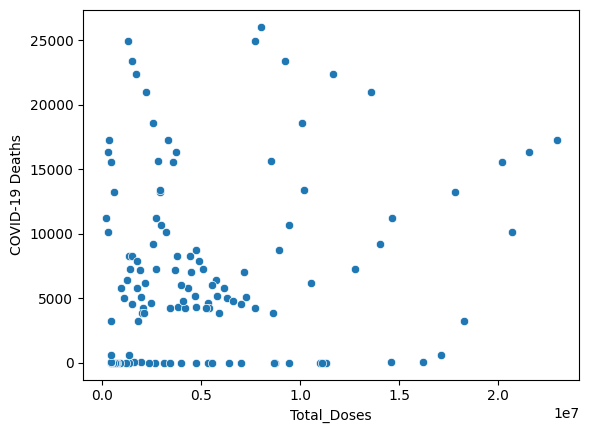

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Total_Doses', y='COVID-19 Deaths', data=df_updated)
plt.show()

In [ ]:
df_updated.to_csv('Total_cleaned_data.csv')